# **Facial Emotion Detection**

Below are listed scenarios where facial emotion detection can be used:
* Face emotion recognition can be used to monitor employee emotions and engagement levels. This can help assess employee satisfaciton, identify areas for improvement, and provide a better work environment.
* Face emotion recognition can also be used to analyze the emotions of customers during interactions with bank representatives to help the bank tail its services to meet customer needs and provide a more personalized empathetic customer experience.
* Face emotion recognition can be used in combination with customer data to understand subscriber's emotional responses to marketing campaigns. This infomration can be used to tailor content and empathize better with the target audience.
* Face emotion recgonition can also be used to analyze customer sentiments and gauge satisfaction levels.
* Face emotion recognition can be used in medical centers for mental health screening, pain assessment, and even for austim spectrum disorder assessments.

Considering the listed scenarios above, we can conclude that different industries can take advantage of a model that recognizes face emotions.

The intended goal is to recognize the emotions a person feeling. Even though humans have a wide range of emotions, in this case, we are only using four categories happy, sad, neutral, and surprised.

We are using data science to build the best performing model that will help us determine whether a person is feeling happy, sad, neutral, or suprised. Data science is helping us in this task because it reads thousands of images that have already being labeled and extracts its features.

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
# Mount Google Drive storage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

# For Data Visualization
import cv2
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
# Define zip folder path
zip_path = "/content/drive/MyDrive/PROJECT_Face_Recognition/Emotions_Extracted/Facial_emotion_images.zip"

In [4]:
# Create a zip file object by opening the zip file specified in path and read it
# "as zip_r" assigns zipfile object to variable zip_r
# extractall extracts all the content from zip file.
# extractall creates subdirectories
with zipfile.ZipFile(zip_path, 'r') as zip_r:
    zip_r.extractall()

###Training Data

In [5]:
# Storing the training path in a variable named DATADIR and storing the unique categories/labels in a list

# Path of training data after unzipping
DATADIR = "/content/drive/MyDrive/PROJECT_Face_Recognition/Emotions_Extracted/Facial_emotion_images/train"
# Storing all the categories in 'CATEGORIES' variable
CATEGORIES = ["happy", "sad", "surprise","neutral"]
# Setting image size
IMG_SIZE = 150

In [6]:
# List content of the root directory of Google Drive to identify correct path
!ls '/content/drive/MyDrive/PROJECT_Face_Recognition/'

Emotions_Extracted  Food_Data.zip


In [7]:
# Here we will be using a user defined function create_training_data() to extract the images from the directory
training_data = []

# Storing all the training images
def create_training_data():
    # Looping over each category from the CATEGORIES list
    for category in CATEGORIES:
        # Joining images with labels
        path = os.path.join(DATADIR, category)
        class_num = category

        for img in os.listdir(path):
            # Reading the data
            img_array = cv2.imread(os.path.join(path, img))
            # Resizing the images
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            # Appending both the images and labels
            training_data.append([new_array, class_num])

create_training_data()

Test Data

In [8]:
# Storing the test path in a variable named DATADIR_test, and storing the unique categories/labels in a list

# Path of training data after unzipping
DATADIR_test = "/content/drive/MyDrive/PROJECT_Face_Recognition/Emotions_Extracted/Facial_emotion_images/test"
# Storing all the categories in 'CATEGORIES' variable
CATEGORIES = ["happy", "sad", "surprise","neutral"]
# Setting image size
IMG_SIZE = 150

In [9]:
# Here we will be using a user defined function create_testing_data() to extract the images from the directory
testing_data = []

# Storing all the testing images
def create_testing_data():
    # Looping over each category from the CATEGORIES list
    for category in CATEGORIES:
        # Joining images with labels
        path = os.path.join(DATADIR_test, category)
        class_num = category

        for img in os.listdir(path):
            # Reading the data
            img_array = cv2.imread(os.path.join(path, img))
            # Resizing the images
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            # Appending both the images and labels
            testing_data.append([new_array, class_num])

create_testing_data()

Validation Data

In [10]:
# Storing the validation path in a variable named DATADIR_val,
# and storing the unique categories/labels in a list

# Path of training data after unzipping
DATADIR_val = "/content/drive/MyDrive/PROJECT_Face_Recognition/Emotions_Extracted/Facial_emotion_images/validation"
# Storing all the categories in 'CATEGORIES' variable
CATEGORIES = ["happy", "sad", "surprise","neutral"]
IMG_SIZE = 150

In [11]:
# Here we will be using a user defined function create_validation_data() to extract the images from the directory
validation_data = []

# Storing all the testing images
def create_validation_data():
    # Looping over each category from the CATEGORIES list
    for category in CATEGORIES:
        # Joining images with labels
        path = os.path.join(DATADIR_val, category)
        class_num = category

        for img in os.listdir(path):
            # Reading the data
            img_array = cv2.imread(os.path.join(path, img))
            # Resizing the images
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            # Appending both the images and labels
            testing_data.append([new_array, class_num])

create_testing_data()

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

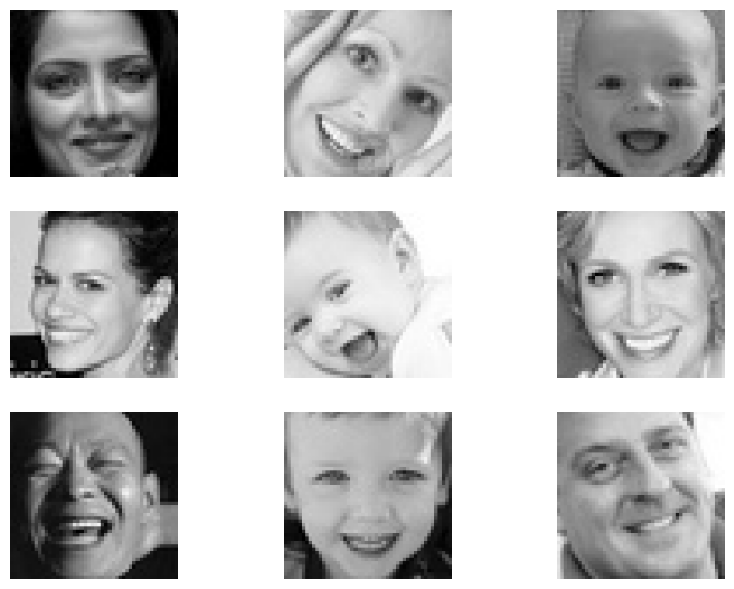

In [12]:
# Randomly select, load, and display images in grayscale from the happy category
happy_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]
select_happy = np.random.choice(happy_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)

    fp = f'{DATADIR}/{CATEGORIES[0]}/{select_happy[i]}'

    fn = load_img(fp, target_size = (150, 150))

    plt.imshow(fn, cmap = 'Greys_r')

    plt.axis('off')

plt.show()

**Observations and Insights:**



*   Most happy faces show their teeth
*   Most happy faces have a smile. Their mouth is shaped as an upward curve.
*   Most faces have their eyes opened.
*   Most faces do not frown.
*   Most faces are looking straight to the camera





### **Sad**

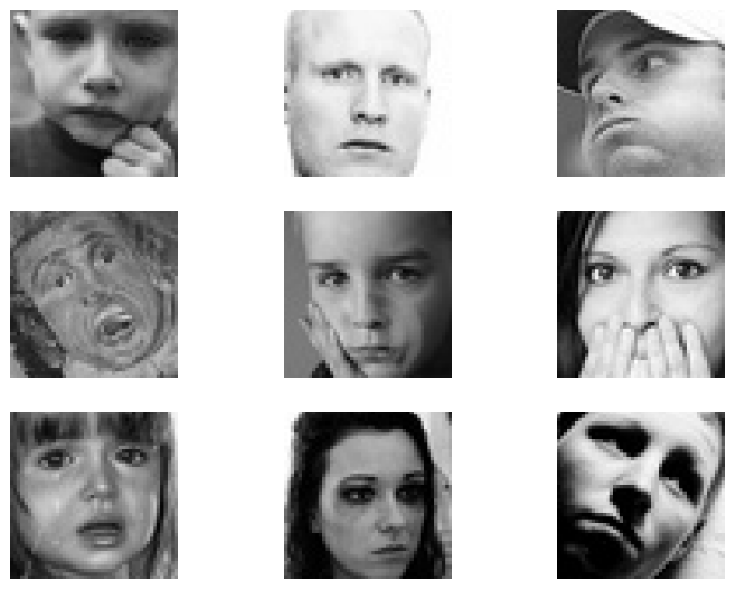

In [13]:
# Randomly select, load, and display images in grayscale from the sad category
sad_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}') ]
select_sad = np.random.choice(sad_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)

    fp = f'{DATADIR}/{CATEGORIES[1]}/{select_sad[i]}'

    fn = load_img(fp, target_size = (150, 150))

    plt.imshow(fn, cmap = 'Greys_r')

    plt.axis('off')

plt.show()

**Observations and Insights:**

*  Some faces make a frown
*  Some faces close their eyes or have their eyes almost closed
*  All faces do not have their mouth making an upward shaped curve
*  Some faces have their mouth in the shape of a straight line.
*  Some faces have their mouth in the shape of a downward shaped curve
*  Some faces are looking away

### **Neutral**

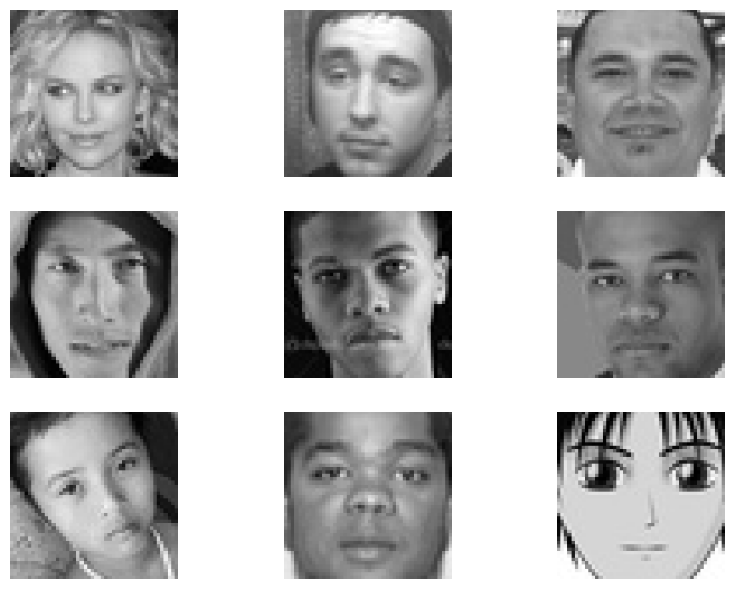

In [14]:
# Randomly select, load, and display images in grayscale from the neutral category
neutral_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[3]}') ]
select_neutral = np.random.choice(neutral_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)

    fp = f'{DATADIR}/{CATEGORIES[3]}/{select_neutral[i]}'

    fn = load_img(fp, target_size = (150, 150))

    plt.imshow(fn, cmap = 'Greys_r')

    plt.axis('off')

plt.show()

**Observations and Insights:**

*  Most faces have their mouth shaped as a straight horizontal line
*  Some faces are looking up

### **Surprised**

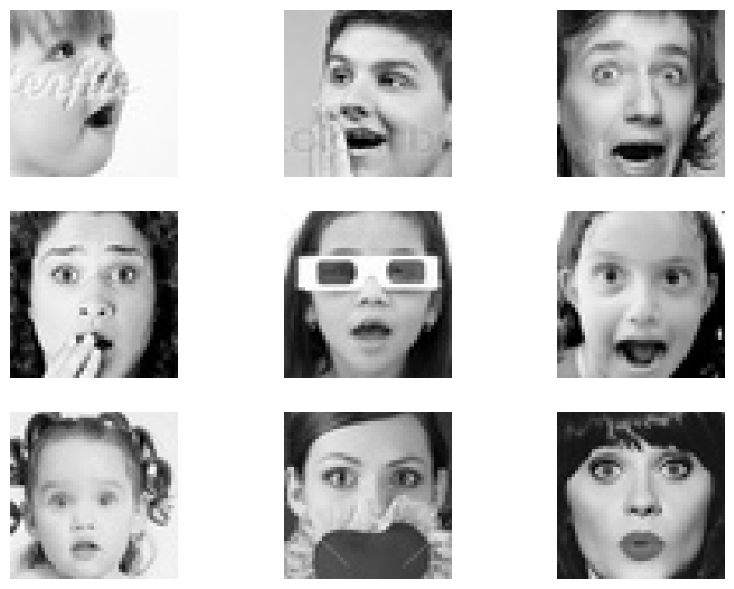

In [15]:
# Randomly select, load, and display images in grayscale from the surprised category
surprised_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]
select_surprised = np.random.choice(surprised_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)

    fp = f'{DATADIR}/{CATEGORIES[2]}/{select_surprised[i]}'

    fn = load_img(fp, target_size = (150, 150))

    plt.imshow(fn, cmap = 'Greys_r')

    plt.axis('off')

plt.show()

**Observations and Insights:**

*  Most faces have their eyes wide open and they are looking straight to the camera
*  Some people put their hands on their face
*  Some people have their mouth open
*  Most faces have their eyebrows shaped like a downward facing curve

Data Preprocessing

In [16]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []
y_train = []

# Shuffling data to reduce variance and making sure that model remains general and overfit less
np.random.shuffle(training_data)
# Iterating over the training data which is generated from the create_training_data() function
for features, label in training_data:
    # Appending images into X_train
    X_train.append(features)
    y_train.append(label)

In [17]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []

# Shuffling data to reduce variance and making sure that model remains general and overfit less
np.random.shuffle(testing_data)
# Iterating over the training data which is generated from the create_testing_data() function
for features, label in testing_data:
    # Appending images into X_test
    X_test.append(features)
    # Appending images into y_test
    y_test.append(label)

In [18]:
# Converting the pixel values into Numpy array
X_train_rgb = np.array(X_train)
X_test_rgb = np.array(X_test)

In [19]:
# Display shape of X_train
X_train_rgb.shape

(15129, 150, 150, 3)

There are 15129 images in the training set. The pixels of each image are 150x150. Images have three channels.

In [20]:
# # Display shape of X_test
X_test_rgb.shape

(256, 150, 150, 3)

There are 256 images in the testing set. The pixels of each image are 150x150. Images have three channels.

In [21]:
# Converting the lists into DataFrames
y_train = pd.DataFrame(y_train, columns = ["Label"], dtype = object)
y_test = pd.DataFrame(y_test, columns = ["Label"], dtype = object)

In [22]:
# Display shape of y_train
y_train.shape

(15129, 1)

There are 15129 image labels in the training set

In [23]:
# Display shape of y_test
y_test.shape

(256, 1)

There are 256 image labels in the testing set

## **Checking Distribution of Classes**

In [24]:
# Printing the value counts of target variable
count = y_train.Label.value_counts()
print(count)

# Display * to separate results
print('*'*10)

# Print normalized value counts of each unique label in the y_train dataset
count = y_train.Label.value_counts(normalize = True)
print(count)

neutral     3998
sad         3982
happy       3976
surprise    3173
Name: Label, dtype: int64
**********
neutral     0.264261
sad         0.263203
happy       0.262807
surprise    0.209730
Name: Label, dtype: float64


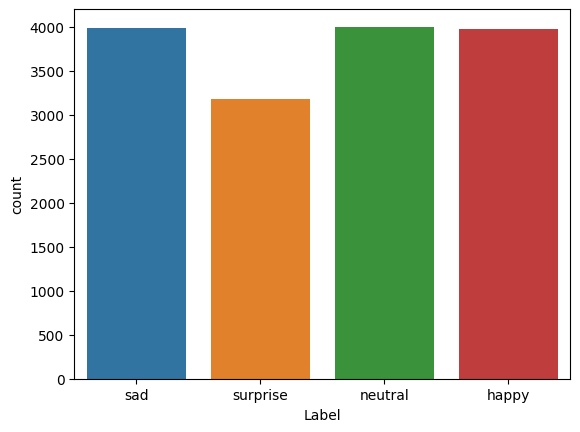

In [25]:
# Plot distribution of each
count_plot = sns.countplot(x = 'Label', data=y_train)

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

**Observations and Insights:**

There is approximately the same amount of data for the neutral, sad, and happy faces images. However, the number of surprised faces images is shorter by almost 800 images. This imbalance can lead to the creation of biased models, increase the number of false positives, and reduce sensitivity. Therefore, I'll address this imbalance with data augmentation.

## **Normalization**

Normalization makes the training go faster and reduces the chances of getting stuck at local optima. Additionally, normalization helps avoid exploding gradient descent.

In [26]:
# Since image pixel values range from 0-255, we divide all pixel values by 255 to standarize all images to have values between 0-1
# Normalize the image data
X_train_rgb = X_train_rgb/255.0
X_test_rgb = X_test_rgb/255.0

In [27]:
# Confirm there is a three channel representation
print(X_train_rgb.shape)
print(X_test_rgb.shape)

(15129, 150, 150, 3)
(256, 150, 150, 3)


In [28]:
# Get a single channel representation
X_train = np.mean(X_train_rgb,axis=3, keepdims=True)
X_test = np.mean(X_test,axis=3, keepdims=True)

In [29]:
# Confirm there is a single channel representation
print(X_train.shape)
print(X_test.shape)

(15129, 150, 150, 1)
(256, 150, 150, 1)


## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

GRAYSCALE

In [30]:
X_train.shape

(15129, 150, 150, 1)

In [31]:
X_test.shape

(256, 150, 150, 1)

In [32]:
from keras.preprocessing.image import ImageDataGenerator

# Set batch size, which is the number of images that will be procesed together during each iteration of training
# The larger the batch size, the more memory it requires
# Using a smaller batch size can prevent overfitting
batch_size  = 32

# Creates an instance of ImageDataGenerator that allows to preprocess image while loading them for training even when data augmentation parameters are not given
# Data augmentation generates additional training images with random transformation
# Data augmentation is done to all classes, not just the imbalanced class. If you were only to augment the imbalanced class, you would get a greater imbalance
datagen_train  = ImageDataGenerator(
    # Randomly rotate images within range of 15 degrees
    rotation_range = 15,
    # Randomly shift images horizontally by 10% of the total width
    width_shift_range = 0.1,
    # Randomly shift images vertically by 10% of the total height
    height_shift_range = 0.1,
    # Apply shear tranformation (geometric transformation) with a shear intensity of 20% (magnituted of shear effect applied to image)
    shear_range = 0.2,
    # Randomly zoom images by up to 20%
    zoom_range = 0.2,
    # Randomly flip images horizontally
    horizontal_flip = True,
    # Use the nearest pixel to fill newly created pixels during transformations
    fill_mode = 'nearest'
)

# ImageDataGenerator allows to preprocess image while loading them for training even when data augmentation parameters are not given
# Data augmentation parameters are not applied to validation and test data sets because the pururpose of these datasets is to evaluate the model's performance on real, unchanged data
datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()

# Generates training data set using the flow_from_directory method
# flow_from_directory method ensures trainingi data is efficiently streamed to the model during training
train_set = datagen_train.flow_from_directory(
                                              # Path to directory that contains training images for different face emotions
                                              DATADIR,
                                              # Size images will be resized to
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              # Choice of color mode images will be loaded
                                              color_mode = "grayscale",
                                              # Batch size fo rthe training data generator
                                              batch_size = batch_size,
                                              # Mentions that problem is a categorial classification task
                                              class_mode = 'categorical',
                                              # Names of classes that model will be trained to recognize
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              # Data generator will shuffle data at the end of each epoch
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(DATADIR_val,
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(DATADIR_test,
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15129 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


RGB

In [33]:
X_train_rgb.shape

(15129, 150, 150, 3)

In [34]:
X_test_rgb.shape

(256, 150, 150, 3)

In [35]:
from keras.preprocessing.image import ImageDataGenerator


batch_size  = 32

datagen_train  = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_set_rgb = datagen_train.flow_from_directory(
                                              DATADIR,
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              # Choice of color mode images will be loaded
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              shuffle = True)

validation_set_rgb = datagen_val.flow_from_directory(DATADIR_val,
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              shuffle = True)

test_set_rgb = datagen_test.flow_from_directory(DATADIR_test,
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15129 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Encoding Target Variable**

Labels must be encoded into numbers or arrays, so that we can compute the cost between the predicted and the real labels

In [36]:
# Represent each class in the form of an array

y_train_encoded = [ ]

for label_name in y_train["Label"]:
    if(label_name == 'happy'):
        y_train_encoded.append(0)

    if(label_name == 'sad'):
        y_train_encoded.append(1)

    if(label_name == 'neutral'):
        y_train_encoded.append(2)

    if(label_name == 'surprise'):
        y_train_encoded.append(3)


y_train_encoded = to_categorical(y_train_encoded, 4)
y_train_encoded

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [37]:
y_train_encoded.shape

(15129, 4)

In [38]:
# Represent each class in the form of an array

y_test_encoded = [ ]

for label_name in y_test["Label"]:
    if(label_name == 'happy'):
        y_test_encoded.append(0)

    if(label_name == 'sad'):
        y_test_encoded.append(1)

    if(label_name == 'neutral'):
        y_test_encoded.append(2)

    if(label_name == 'surprise'):
        y_test_encoded.append(3)


y_test_encoded = to_categorical(y_test_encoded, 4)
y_test_encoded

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [39]:
y_test_encoded.shape

(256, 4)

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

While Convolutional Neural Networks are specialized in processing images and videos, Artificial Neural Networks are more general and are better suited for other various types of data.
CNNs do great with image classification, object detection, and image segmentation tasks. ANNs do great with regression, classification, and time-series forecasting tasks.
ANNs lack spatial awareness. CNNs are spatially invariant, which means that they can recognize images even when they are tilted.
Considering all these facts, CNNs are the best choice for face emotion recognition.

In [40]:
# Fix the seed for random number generators
# We set the seed for random number generator to ensure we can reproduce same results every time we run the code
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


### **Creating the Base Neural Network GRAYSCALE**

In [42]:
from keras import regularizers

# Intializing a sequential model
# Create an instance of a Sequential model in Keras
# Sequential model is a linear stack of layers that is suitable for building feedforward neural networks
# In this step a blank canvas is created for constructing the neural network
model1 = Sequential()

# First Convolutional Block

# Adding first conv layer with 32 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Conv2D layer performs a 2D convolutional operation on the input data
# 2D convolutional layer is used to learn spatial patterns and features from images
# There are 32 filters in the convolutional layer. Each one will detect different patterns in the input data
# Padding is applied before the convolution operation. The same type of padding ensures the output feature map has the same spatial dimensions as the input.
# Padding pads the input data with zeros, so that the convolution operation does not shrink the spatial dimensions
# Input_shape specifies the shape of the input data expected by this layer
model1.add(Conv2D(32, (3, 3), input_shape = (150, 150, 1), padding = 'same'))

# Add a LeakyRelu layer with the slope equal to 0.1
# LeakyReLU introduces a small slope for negative input values, which ensures neurons remain active during transformation
# A larger negative slope, like 0.2 would allow more negative values to pass through the activation function
model1.add(LeakyReLU(0.1))

# A max-pooling layer with a pool size of 2x2 (this is the pooling window)
# This layer reduces the spatial dimensions of the input data. This layer effectively downsamples the feature maps
# This layer reduces the number of parameters and computation in the model while keeping the most important information in the feature maps
# This layer introduces a degree of translational invariance, which makes the model more robut to small translations in the input data
model1.add(MaxPooling2D(2, 2))

# Batch normalization layer stabilizes the training process and improves generalization
# momentum parameter controls the contribution of the moving averages from the previous batches to the current batch. A higher momentum value (usually close to 1) allows the model to retain more information from previous batches, which can stabilize the training process and improve generalization
# epsilon parameter is a small value added to the variance to avoid division by zero. It helps ensure numerical stability during training and prevents potential issues with very small variances
# specifying gamma_regularizer parameter will add a penalty term to the loss function based on the gamma parameter, discouraging large weights in the batch normalization layer
model1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Second Convolutional Block
# In a Conv2D layer, the number of filters determines the depth of the layer.
# In a Conv2D having a higher depth allows the model to learn more diverse and complex patterns from the data. The model becomes more complex because of this number increasing
model1.add(Conv2D(64, (3, 3), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(2, 2))
model1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Third Convolutional Block
model1.add(Conv2D(128, (3, 3), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(2,2))
model1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Fourth Convolutional Block
model1.add(Conv2D(256, (3, 3), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(2, 2))
model1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
# This layer is used to transition between convolutional and fully connected layers
# This layer reshapes the multidimensional feature maps into a one-dimensional vector
model1.add(Flatten())

# Fully Connected
# A dense layer is a fully connected layer in which every neuron is connnected to every neuron in the previous layer
# Each neuron in the dense layer performs a weighted sum of the input values and applies an activation function to produce an output
# If the activation function is not specified, it'll use the rectified linear unit activation function
# In this Dense layer, 512 was choosen because it is a power of 2 and tends to work well in practice.
# In this Dense layer, a higher number may lead to a higher computational cost. A smaller number like 128 or 256 may reduce the model's capacity to learn complex patterns from the data
model1.add(Dense(512))
model1.add(LeakyReLU(0.1))
# Add dropout layer with 50% probability of dropping neurons. The higher the probability, the more you are encouragin the network to learn more robust features
model1.add(Dropout(0.5))


# Classifier
# There are four categories, which is why the number 4 is set here
# Softmax function is used because it is multi-class classification problems.
# Softmax function transforms the raw model outputs into a probability distribution over multiple classes
# Softmax function ensures the sum of all probabilities in the output vector is equal to 1
model1.add(Dense(4, activation = 'softmax'))

# Optimizer is responsible for updating the model's performance during training to minimize the loss function and improve the model's performance
# The smaller the learning rate parameter, the slower convergence, but it may result on more accurate weight updates
# The larger the learning rate parameter, leads to faster convergence, but it risks overshooting the optimal solution
# momentum parameter helps optimizr overcome certain issues with traditional SGD
opt = SGD(learning_rate = 0.01, momentum = 0.9)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0

### **Compiling and Training the Model**

In [43]:
# Compiling the model
# We use categorical cross-entropy loss function because it is a multi-class classification problem
# Each input sample belogns to one of multiple classes
model1.compile(loss ='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [44]:
# The following lines of code saves the best model's parameters if training accuracy goes down on further training

# Early stopping is used during the training of a neural networ to stop training under certain conditions
# monitor parameter specifies the metric to monitor during training. In this case, the model will stop training when the validation loss stops improving
# mode parameter dfines the direction in which the monitored metric should be considered for improvement. In this case, min means the training will stop when validation loss stops decreasing
# verbose parameter determines the verbosity model. When set to 1, means that progress messages will be displayed
# patience parameter sets the number of epochs with no improvment afte which training will be stopped. In this case, if validation loss does not improve for 5 consecutive epochs, training will be stopped. A larger the patience allows the model more time to find better weights and can help avoid stopping too early when model is still improving.
es1 = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

# Model Checkpoint is used to save the model's weights at certain points, based on specified criteria
# The h5 extension indicates model will be saved in the Hierarchical Data Format file. If you would only want to save the weights, you can use other formats, such as .hdf5 and .hd5
# monitor parameter specifies metric to monitor during training. In this case, callback will monitor the validation accuracy of the model
# mode parameter defines direction in which the monitored metric should be considered for improvement. In this case, max means the training will save the model's weights when the validation accuracy reaches its maximum value
# verbose parameter controls amount of output displayed during training. Value of 1 means progress messagse will be shown
# save_best_only parameter when set to true it will overwritte the saved model only when a better validation accuracy is achieved
mc1 = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)


In [45]:
# Fitting the model with 30 epochs and validation_split as 10%
history1=model1.fit(
          # numpy array containing training samples
          X_train,
          # numpy array containing the encoded labels for each training sample
          y_train_encoded,
          # number of times entire training dataset is passed through the neural network
          epochs = 20,
          # number of samples in each mini-batch during training
          batch_size= 32,
          # proportion of the training data use as validation set during tarining
          validation_split = 0.10,
          # list of callback functions to be applied during training
          callbacks = [es1, mc1])

Epoch 1/20
426/426 [==============================] - ETA: 0s - loss: 4.6248 - accuracy: 0.3912
Epoch 1: val_accuracy improved from -inf to 0.51950, saving model to best_model.h5
426/426 [==============================] - 16s 11ms/step - loss: 4.6248 - accuracy: 0.3912 - val_loss: 1.5647 - val_accuracy: 0.5195
Epoch 2/20
420/426 [============================>.] - ETA: 0s - loss: 1.3027 - accuracy: 0.5321
Epoch 2: val_accuracy improved from 0.51950 to 0.56312, saving model to best_model.h5
426/426 [==============================] - 4s 9ms/step - loss: 1.3023 - accuracy: 0.5311 - val_loss: 1.0883 - val_accuracy: 0.5631
Epoch 3/20
420/426 [============================>.] - ETA: 0s - loss: 1.0215 - accuracy: 0.5882
Epoch 3: val_accuracy improved from 0.56312 to 0.60476, saving model to best_model.h5
426/426 [==============================] - 4s 9ms/step - loss: 1.0207 - accuracy: 0.5888 - val_loss: 0.9465 - val_accuracy: 0.6048
Epoch 4/20
424/426 [============================>.] - ETA: 0s 

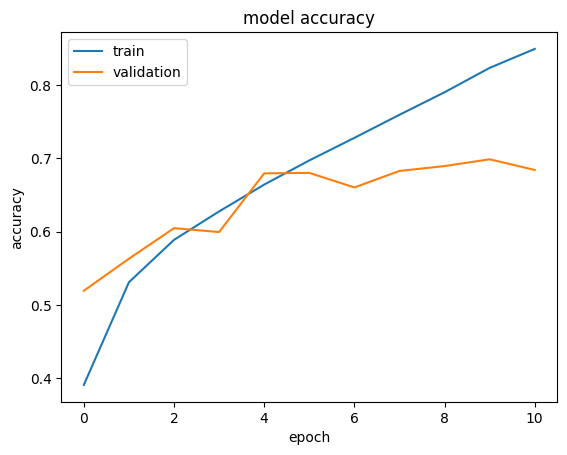

In [46]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In the above plot, I see the model performs better in the training data set, with an accuracy of 80%, than the validation data set, with an accuracy of 70%

### **Evaluating the Model on the Test Set**

In [47]:
model1.evaluate(X_test, y_test_encoded, verbose = 2)

8/8 - 0s - loss: 1293.8596 - accuracy: 0.3047 - 51ms/epoch - 6ms/step


[1293.859619140625, 0.3046875]

Given the above output, I see that after processing all batches, we got a loss score of 1293.86. The model correctly predicted 30% of the samples. It took approximately 51ms on average to process one epoch. It took approximately 6ms to process one mini-batch.

8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.43      0.19      0.26        64
           2       0.67      0.06      0.11        64
           3       0.28      0.97      0.43        64

    accuracy                           0.30       256
   macro avg       0.34      0.30      0.20       256
weighted avg       0.34      0.30      0.20       256



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


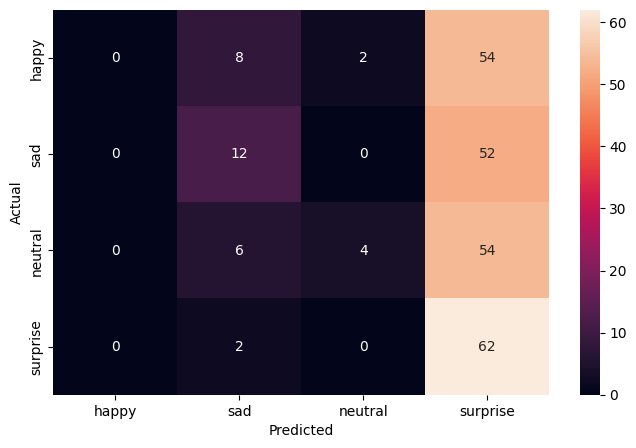

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model1.predict(X_test)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral','surprise'], yticklabels=['happy', 'sad', 'neutral','surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**
There were 62 times when the face emotion of surprise was correctly predicted. There were 6 times when the face emotion neutral was predicted to be sad.

# **Creating the Base Neural Network RGB**

In [49]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [50]:
# Intializing a sequential model
model1_1 = Sequential()

# First Convolutional Block
model1_1.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), padding = 'same'))
model1_1.add(LeakyReLU(0.1))
model1_1.add(MaxPooling2D(2, 2))
model1_1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Second Convolutional Block
model1_1.add(Conv2D(64, (3, 3), padding = 'same'))
model1_1.add(LeakyReLU(0.1))
model1_1.add(MaxPooling2D(2, 2))
model1_1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))


# Third Convolutional Block
model1_1.add(Conv2D(128, (3, 3), padding = 'same'))
model1_1.add(LeakyReLU(0.1))
model1_1.add(MaxPooling2D(2,2))
model1_1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))



# Fourth Convolutional Block
model1_1.add(Conv2D(256, (3, 3), padding = 'same'))
model1_1.add(LeakyReLU(0.1))
model1_1.add(MaxPooling2D(2, 2))
model1_1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

model1_1.add(Flatten())

# Fully Connected
model1_1.add(Dense(512))
model1_1.add(LeakyReLU(0.1))
model1_1.add(Dropout(0.5))


# Classifier
model1_1.add(Dense(4, activation = 'softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate = 0.01, momentum = 0.9)

model1_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0

In [51]:
# Compiling the model
model1_1.compile(loss ='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [52]:
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es1_1 = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc1_1 = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [53]:
# Fitting the model with 30 epochs and validation_split as 10%
history1_1=model1_1.fit(
          X_train_rgb,
          y_train_encoded,
          epochs = 30,
          batch_size= 32,
          validation_split = 0.10,
          callbacks = [es1_1, mc1_1])

Epoch 1/30
426/426 [==============================] - ETA: 0s - loss: 4.0859 - accuracy: 0.3948
Epoch 1: val_accuracy improved from -inf to 0.49174, saving model to best_model.h5
426/426 [==============================] - 7s 13ms/step - loss: 4.0859 - accuracy: 0.3948 - val_loss: 1.6885 - val_accuracy: 0.4917
Epoch 2/30
424/426 [============================>.] - ETA: 0s - loss: 1.2963 - accuracy: 0.5581
Epoch 2: val_accuracy improved from 0.49174 to 0.58163, saving model to best_model.h5
426/426 [==============================] - 5s 11ms/step - loss: 1.2964 - accuracy: 0.5578 - val_loss: 1.0519 - val_accuracy: 0.5816
Epoch 3/30
425/426 [============================>.] - ETA: 0s - loss: 0.9636 - accuracy: 0.6268
Epoch 3: val_accuracy improved from 0.58163 to 0.58691, saving model to best_model.h5
426/426 [==============================] - 5s 11ms/step - loss: 0.9637 - accuracy: 0.6265 - val_loss: 1.0052 - val_accuracy: 0.5869
Epoch 4/30
425/426 [============================>.] - ETA: 0s

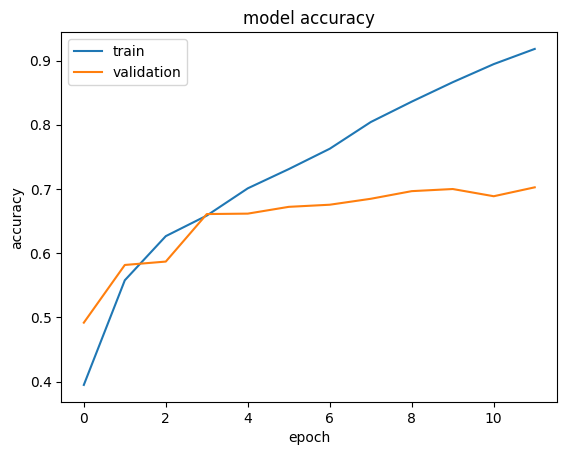

In [54]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history1_1.history['accuracy'])
plt.plot(history1_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In the above plot, I see the model performed better in the training set, with an accuracy of 90%, than the validation set, with an accuracy of 70%.

In [55]:
model1_1.evaluate(X_test_rgb, y_test_encoded, verbose = 2)

8/8 - 0s - loss: 0.7580 - accuracy: 0.7344 - 63ms/epoch - 8ms/step


[0.7580010890960693, 0.734375]

Given the above output, I see that after processing all batches, we got a loss score of 0.75. The model correctly predicted 73% of the samples. It took approximately 63ms on average to process one epoch. It took approximately 8ms to process one mini-batch.

8/8 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        64
           1       0.67      0.62      0.65        64
           2       0.65      0.69      0.67        64
           3       0.90      0.84      0.87        64

    accuracy                           0.73       256
   macro avg       0.74      0.73      0.74       256
weighted avg       0.74      0.73      0.74       256



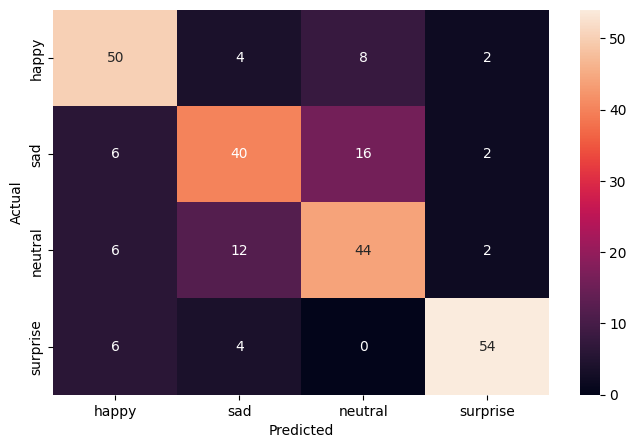

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model1_1.predict(X_test_rgb)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral','surprise'], yticklabels=['happy', 'sad', 'neutral','surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

There were 54 times when the face emotion of surprise was correctly predicted. There were 12 times when the face emtion was predicted to be sad, but it was neutral.

### **Creating the second Convolutional Neural Network GRAYSCALE**

- Try out a slightly larger architecture

In [57]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [58]:
# Intializing a sequential model
model2 = Sequential()

# First Convolutional Block
model2.add(Conv2D(32, (3, 3), input_shape = (150, 150, 1), padding = 'same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))
model2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Second Convolutional Block
model2.add(Conv2D(64, (3, 3), padding = 'same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))
model2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Third Convolutional Block
model2.add(Conv2D(128, (3, 3), padding = 'same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Fourth Convolutional Block
model2.add(Conv2D(256, (3, 3), padding = 'same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))
model2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Fifth Convolutional Block
model2.add(Conv2D(512, (3, 3), padding = 'same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Sixth Convolutional Block
model2.add(Conv2D(1024, (3, 3), padding = 'same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))
model2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))


model2.add(Flatten())

# Fully Connected Block
model2.add(Dense(512))
model2.add(LeakyReLU(0.1))
model2.add(Dropout(0.7))

# Classifier
model2.add(Dense(4, activation = 'softmax'))

opt = SGD(learning_rate = 0.01, momentum = 0.9)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0

### **Compiling and Training the Model**

In [59]:
# Compiling the model
model2.compile(loss ='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [60]:
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es2 = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 7)
mc2 = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

# Fitting the model with 30 epochs and validation_split as 10%
history2=model2.fit(X_train,
          y_train_encoded,
          epochs = 30,
          batch_size= 32, validation_split = 0.10, callbacks = [es2, mc2])

Epoch 1/30
426/426 [==============================] - ETA: 0s - loss: 14.7379 - accuracy: 0.2894
Epoch 1: val_accuracy improved from -inf to 0.32122, saving model to best_model.h5
426/426 [==============================] - 7s 12ms/step - loss: 14.7379 - accuracy: 0.2894 - val_loss: 3.5377 - val_accuracy: 0.3212
Epoch 2/30
425/426 [============================>.] - ETA: 0s - loss: 2.3703 - accuracy: 0.3593
Epoch 2: val_accuracy improved from 0.32122 to 0.42036, saving model to best_model.h5
426/426 [==============================] - 4s 10ms/step - loss: 2.3697 - accuracy: 0.3590 - val_loss: 1.6440 - val_accuracy: 0.4204
Epoch 3/30
425/426 [============================>.] - ETA: 0s - loss: 1.4146 - accuracy: 0.4304
Epoch 3: val_accuracy improved from 0.42036 to 0.44217, saving model to best_model.h5
426/426 [==============================] - 4s 10ms/step - loss: 1.4145 - accuracy: 0.4304 - val_loss: 1.2623 - val_accuracy: 0.4422
Epoch 4/30
426/426 [==============================] - ETA: 

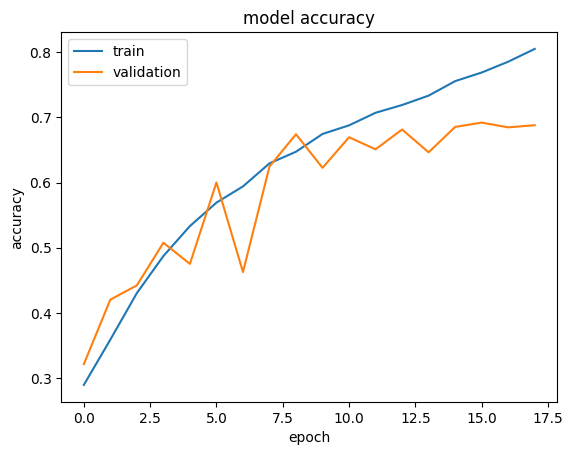

In [61]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In the above plot, I see the model performed better in the training data, with an accuracy of 80%, than the validation data, with an accuracy of 70%.

### **Evaluating the Model on the Test Set**

In [62]:
model2.evaluate(X_test, y_test_encoded, verbose = 2)

8/8 - 0s - loss: 22166.6445 - accuracy: 0.3359 - 55ms/epoch - 7ms/step


[22166.64453125, 0.3359375]

In the above output, I see that after processing all batches, we got a loss score of 22166.64. The model correctly predicted 34% of the training samples. It took approximately 55ms on average to process on epoch and 7ms to process one mini-batch.

8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.36      0.12      0.19        64
           1       0.00      0.00      0.00        64
           2       0.36      0.47      0.41        64
           3       0.32      0.75      0.45        64

    accuracy                           0.34       256
   macro avg       0.26      0.34      0.26       256
weighted avg       0.26      0.34      0.26       256



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


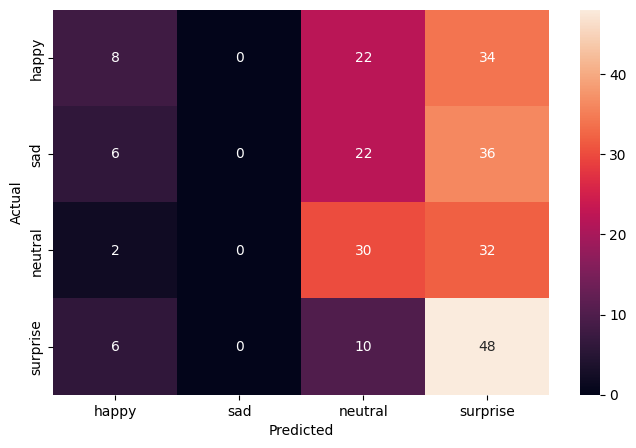

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model2.predict(X_test)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral','surprise'], yticklabels=['happy', 'sad', 'neutral','surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**
In the above plot, I see that the face emotion surprise was correctly predicted 48 times. I also see that the face emotion neutral was predicted as happy 2 times.

### **Creating the second Convolutional Neural Network RGB**

In [64]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [65]:
# Intializing a sequential model
model2_2 = Sequential()

# First Convolutional Block
model2_2.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), padding = 'same'))
model2_2.add(LeakyReLU(0.1))
model2_2.add(MaxPooling2D(2, 2))
model2_2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Second Convolutional Block
model2_2.add(Conv2D(64, (3, 3), padding = 'same'))
model2_2.add(LeakyReLU(0.1))
model2_2.add(MaxPooling2D(2, 2))
model2_2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Third Convolutional Block
model2_2.add(Conv2D(128, (3, 3), padding = 'same'))
model2_2.add(LeakyReLU(0.1))
model2_2.add(MaxPooling2D(2,2))
model2_2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Fourth Convolutional Block
model2_2.add(Conv2D(256, (3, 3), padding = 'same'))
model2_2.add(LeakyReLU(0.1))
model2_2.add(MaxPooling2D(2, 2))
model2_2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Fifth Convolutional Block
model2_2.add(Conv2D(512, (3, 3), padding = 'same'))
model2_2.add(LeakyReLU(0.1))
model2_2.add(MaxPooling2D(2,2))
model2_2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Sixth Convolutional Block
model2_2.add(Conv2D(1024, (3, 3), padding = 'same'))
model2_2.add(LeakyReLU(0.1))
model2_2.add(MaxPooling2D(2, 2))
model2_2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))


model2_2.add(Flatten())

# Fully Connected Block
model2_2.add(Dense(512))
model2_2.add(LeakyReLU(0.1))
model2_2.add(Dropout(0.7))

# Classifier
model2_2.add(Dense(4, activation = 'softmax'))

opt = SGD(learning_rate = 0.01, momentum = 0.9)

model2_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0

In [66]:
# Compiling the model
model2_2.compile(loss ='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [67]:
X_train_rgb.shape

(15129, 150, 150, 3)

In [68]:
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es2_2 = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 7)
mc2_2 = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

# Fitting the model with 60 epochs and validation_split as 10%
history2_2=model2_2.fit(X_train_rgb,
          y_train_encoded,
          epochs = 30,
          batch_size= 32, validation_split = 0.10, callbacks = [es2_2, mc2_2])

Epoch 1/30
424/426 [============================>.] - ETA: 0s - loss: 14.7837 - accuracy: 0.3005
Epoch 1: val_accuracy improved from -inf to 0.40119, saving model to best_model.h5
426/426 [==============================] - 8s 14ms/step - loss: 14.7442 - accuracy: 0.3008 - val_loss: 3.5625 - val_accuracy: 0.4012
Epoch 2/30
426/426 [==============================] - ETA: 0s - loss: 2.3879 - accuracy: 0.3664
Epoch 2: val_accuracy improved from 0.40119 to 0.40383, saving model to best_model.h5
426/426 [==============================] - 5s 12ms/step - loss: 2.3879 - accuracy: 0.3664 - val_loss: 1.6648 - val_accuracy: 0.4038
Epoch 3/30
425/426 [============================>.] - ETA: 0s - loss: 1.4326 - accuracy: 0.4108
Epoch 3: val_accuracy improved from 0.40383 to 0.46398, saving model to best_model.h5
426/426 [==============================] - 5s 12ms/step - loss: 1.4327 - accuracy: 0.4106 - val_loss: 1.2339 - val_accuracy: 0.4640
Epoch 4/30
421/426 [============================>.] - ETA: 

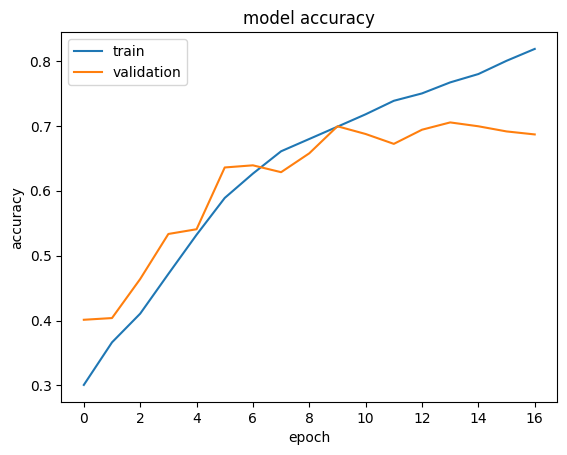

In [69]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history2_2.history['accuracy'])
plt.plot(history2_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In the above plot, I see that the model performed better on the training set, with an accuracy of 80%, than the validation set, with an accuracy of 70%.

In [70]:
model2_2.evaluate(X_test_rgb, y_test_encoded, verbose = 2)

8/8 - 0s - loss: 0.7724 - accuracy: 0.7422 - 66ms/epoch - 8ms/step


[0.7724349498748779, 0.7421875]

Given the above output, I see that after processing all batches, we got a loss score of 0.77. The model correctly predicted 74% of the samples. It took approximately 66ms on average to process one epoch. It took approximately 8ms to process one mini-batch.

8/8 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        64
           1       0.67      0.62      0.65        64
           2       0.60      0.75      0.67        64
           3       1.00      0.81      0.90        64

    accuracy                           0.74       256
   macro avg       0.76      0.74      0.75       256
weighted avg       0.76      0.74      0.75       256



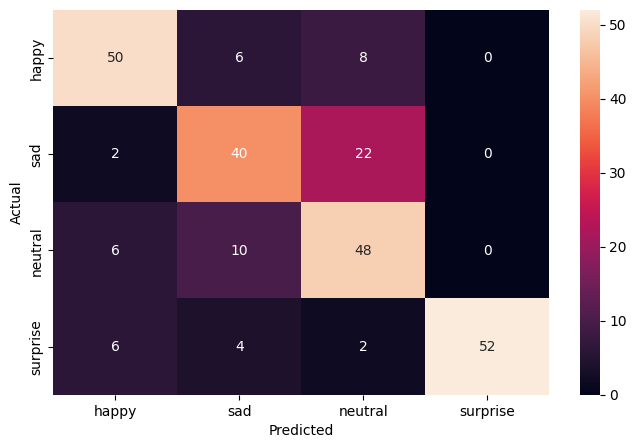

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model2_2.predict(X_test_rgb)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral','surprise'], yticklabels=['happy', 'sad', 'neutral','surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In the above plot, I see that the face emotion surprise was correctly predicted 52 times. I also see that the face emotion neutral was predicted as sad 10 times.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

The CNN models that received input in RGB mode had a satisfactory performance. They had significantly better performance on the testing set than the CNN models that received images in grayscale mode. RGB images contain more detailed and rich information about visual content, including color variations and texture details. Therefore, it has an advantage over the grayscale. When the images were uploaded, they were already in RGB mode. So, when they were fed into the data loaders, we needed to specify the RGB mode. To test the performance of the models with grayscale images, the images were converted into a single channel and they were fed into the data loaders with the grayscale mode.

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [72]:
from keras.preprocessing.image import ImageDataGenerator

# Set batch size, which is the number of images that will be procesed together during each iteration of training
# The larger the batch size, the more memory it requires
# Increasing the batch size since it is a transfer learning architecture
batch_size  = 64

# Creates an instance of ImageDataGenerator that allows to preprocess image while loading them for training even when data augmentation parameters are not given
# Data augmentation generates additional training images with random transformation
# Data augmentation is done to all classes, not just the imbalanced class. If you were only to augment the imbalanced class, you would get a greater imbalance
datagen_train  = ImageDataGenerator(
    # Randomly rotate images within range of 15 degrees
    rotation_range = 15,
    # Randomly shift images horizontally by 10% of the total width
    width_shift_range = 0.1,
    # Randomly shift images vertically by 10% of the total height
    height_shift_range = 0.1,
    # Apply shear tranformation (geometric transformation) with a shear intensity of 20% (magnituted of shear effect applied to image)
    shear_range = 0.2,
    # Randomly zoom images by up to 20%
    zoom_range = 0.2,
    # Randomly flip images horizontally
    horizontal_flip = True,
    # Use the nearest pixel to fill newly created pixels during transformations
    fill_mode = 'nearest'
)

# ImageDataGenerator allows to preprocess image while loading them for training even when data augmentation parameters are not given
# Data augmentation parameters are not applied to validation and test data sets because the pururpose of these datasets is to evaluate the model's performance on real, unchanged data
datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()

# Generates training data set using the flow_from_directory method
# flow_from_directory method ensures trainingi data is efficiently streamed to the model during training
train_set_rgb = datagen_train.flow_from_directory(
                                              # Path to directory that contains training images for different face emotions
                                              DATADIR,
                                              # Size images will be resized to
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              # Choice of RGB mode images will be loaded. This mode is what is accepted by transfer learning architectures
                                              color_mode = "rgb",
                                              # Batch size for the training data generator
                                              batch_size = batch_size,
                                              # Mentions that problem is a categorial classification task
                                              class_mode = 'categorical',
                                              # Names of classes that model will be trained to recognize
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              # Data generator will shuffle data at the end of each epoch
                                              shuffle = True)

validation_set_rgb = datagen_val.flow_from_directory(DATADIR_val,
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              shuffle = True)

test_set_rgb = datagen_test.flow_from_directory(DATADIR_test,
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15129 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

VGG16 is a popular deep convolutional neural network architecture known for its simplicity and effectiveness in image recognition tasks. It has a series of convolutional layers followed by fully connected (dense) layers, which allows it to learn hierarchical features from images and perform high-level image recognition tasks. The pre-trained VGG16 model can be used as a powerful feature extractor for transfer learning or fine-tuned for specific image classification tasks.

### **Importing the VGG16 Architecture**

In [73]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [74]:
# Summary of the whole model
model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 26s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [99]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [100]:
# Retrieves up to chosen layer from the pre-existing VGG6 model
transfer_layer = model.get_layer('block4_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)

In [101]:
# Print summary of VGG16 model
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [102]:
# weights are pre-trained on the ImageNet dataset
# include_top = False is excluding fully connected layers from the model
# input_shape is the shape of the input that will be fed to model
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (150,150,3))

# Print summary of VGG16 model architecture
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [103]:
# Making all the layers of the VGG16 model non-trainable. i.e. freezing them
# Setting all layers of the VGG16 model to be non-trainable. This prevents weights from being updated during the backpropagation step of training
# In this way, knowledge from VGG16 is leveraged for my specific task
for layer in vgg_model.layers:
    layer.trainable = False

In [104]:
# Displaying if layers are trainable
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [105]:
# Intializing a sequential model
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(512, activation='relu'))
new_model.add(Dense(256, activation='relu'))
new_model.add(Dense(128, activation='relu'))

# Adding the output layer for multi-class classification (4 categories)
new_model.add(Dense(4, activation='softmax'))

# Using Adam Optimizer
opt = Adam(learning_rate=0.001)

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 19,074,244
Trainable params: 4,359,556
Non

### **Compiling and Training the VGG16 Model**

In [106]:
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
# Fitting the VGG model
new_model_history = new_model.fit(train_set_rgb,
                                  validation_data=validation_set_rgb,
                                  epochs=5)

Epoch 1/5
237/237 [==============================] - 94s 389ms/step - loss: 1.8748 - accuracy: 0.5109 - val_loss: 0.9672 - val_accuracy: 0.6038
Epoch 2/5
237/237 [==============================] - 92s 390ms/step - loss: 0.9828 - accuracy: 0.6012 - val_loss: 0.9162 - val_accuracy: 0.6315
Epoch 3/5
237/237 [==============================] - 93s 391ms/step - loss: 0.9291 - accuracy: 0.6151 - val_loss: 1.0205 - val_accuracy: 0.5941
Epoch 4/5
237/237 [==============================] - 93s 390ms/step - loss: 0.8853 - accuracy: 0.6401 - val_loss: 0.9279 - val_accuracy: 0.6305
Epoch 5/5
237/237 [==============================] - 93s 392ms/step - loss: 0.8666 - accuracy: 0.6435 - val_loss: 1.0298 - val_accuracy: 0.5909


In [108]:
# Function to plot loss, val_loss,
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

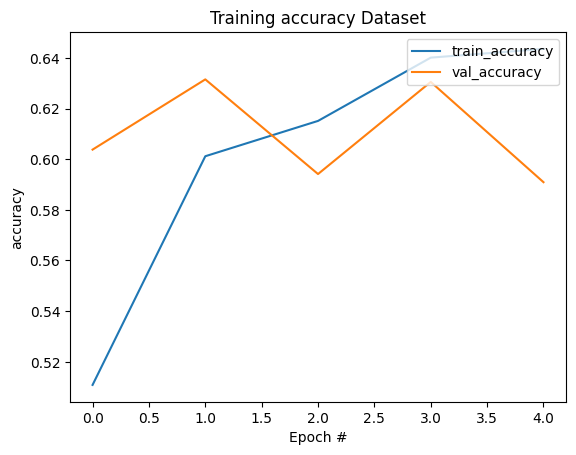

In [109]:
# Plotting the loss vs epoch curve for the Transfer Learning model
plot_history(new_model_history)

In the above plot, I see that model performed better on the training set, with an accuracy of 64%, than the validation set, with an accuracy of 60%.

### **Evaluating the VGG16 model**

In [110]:
# Evaluate method calculates the loss value and any additional metrics specified during the model compilation
# X_test_rgb is the input test data
# y_test_encoded is the true label for the test data. This format should match the output layer
# verbose =2 means one line per epoch
new_model.evaluate(X_test_rgb, y_test_encoded, verbose = 2)

8/8 - 0s - loss: 1.3931 - accuracy: 0.2500 - 127ms/epoch - 16ms/step


[1.3931446075439453, 0.25]

In the above output, I see that after processing all batches, we got a loss score of 1.39. The model correctly predicted 25% of the samples. It took approximately 127ms on average to process one epoch. It took 16 milliseconds to process one mini-batch.

8/8 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        64
           1       1.00      0.00      0.00        64
           2       1.00      0.00      0.00        64
           3       1.00      0.00      0.00        64

    accuracy                           0.25       256
   macro avg       0.81      0.25      0.10       256
weighted avg       0.81      0.25      0.10       256



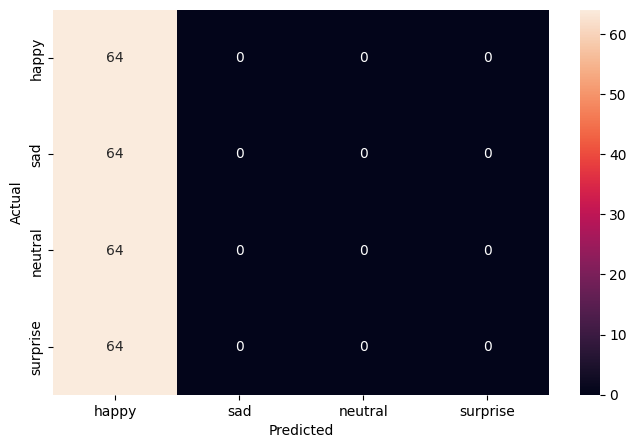

In [151]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Use trained data
pred = new_model.predict(X_test_rgb)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred,zero_division=1))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral','surprise'], yticklabels=['happy', 'sad', 'neutral','surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In the above plot, I see that the face emotion happy was correctly predicted 64 times. I also see that the face emotion neutral was predicted to be happy 64 times.

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:**

The performance of the model in the validation set has an accuracy that peaks at 63%, but ultimately ends on 60%. The performance of the model in the training set has an accuracy that is consistently improving, reaching an accuracy of 64%.

## **ResNet V2 Model**

In [112]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model

In [113]:
# Summary of the whole model
model2 = ResNet50V2(weights='imagenet')
model2.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [114]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [115]:
# Retrieves up to chosen layer from the pre-existing ResNet V2 model
transfer_layer2 = model2.get_layer('conv3_block3_2_bn')
resnet_model = Model(inputs=model2.input, outputs=transfer_layer2.output)

In [116]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [117]:
resnet_model = ResNet50V2(weights='imagenet', include_top = False, input_shape = (150,150,3))
resnet_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']    

In [118]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
# When freezing, weights will remain unchanged during training
for layer in resnet_model.layers:
    layer.trainable = False

In [119]:
for layer in resnet_model.layers:
    print(layer.name, layer.trainable)

input_1 False
conv1_pad False
conv1_conv False
pool1_pad False
pool1_pool False
conv2_block1_preact_bn False
conv2_block1_preact_relu False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_pad False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_out False
conv2_block2_preact_bn False
conv2_block2_preact_relu False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_pad False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_out False
conv2_block3_preact_bn False
conv2_block3_preact_relu False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_pad False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
max_pooling2d False
conv2_block3_3_conv False
conv2_block3_out False
conv3_block1_pre

In [120]:
# Intializing a sequential model
new_model2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model2.add(resnet_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model2.add(Flatten())

# Adding a dense output layer
new_model2.add(Dense(512, activation='relu'))
new_model2.add(Dense(256, activation='relu'))
new_model2.add(Dense(128, activation='relu'))

# Adding the output layer for multi-class classification (4 categories)
new_model2.add(Dense(4, activation='softmax'))

# Using Adam Optimizer
opt = Adam(learning_rate=0.001)

new_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 5, 5, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 49,944,452
Trainable params: 26,379,652
No

### **Compiling and Training the Model**

In [121]:
new_model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [122]:
# Fitting the VGG model
new_model_history2 = new_model2.fit(train_set_rgb,
                                  validation_data=validation_set_rgb,
                                  epochs=5)

Epoch 1/5
237/237 [==============================] - 99s 400ms/step - loss: 163.5317 - accuracy: 0.3084 - val_loss: 10.3597 - val_accuracy: 0.4469
Epoch 2/5
237/237 [==============================] - 96s 405ms/step - loss: 19.9563 - accuracy: 0.3405 - val_loss: 11.0157 - val_accuracy: 0.3390
Epoch 3/5
237/237 [==============================] - 97s 408ms/step - loss: 5.5868 - accuracy: 0.3682 - val_loss: 3.7035 - val_accuracy: 0.4179
Epoch 4/5
237/237 [==============================] - 95s 400ms/step - loss: 2.6733 - accuracy: 0.3836 - val_loss: 1.6366 - val_accuracy: 0.4469
Epoch 5/5
237/237 [==============================] - 94s 398ms/step - loss: 1.5651 - accuracy: 0.4187 - val_loss: 1.2348 - val_accuracy: 0.5007


In [123]:
# Function to plot loss, val_loss,
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

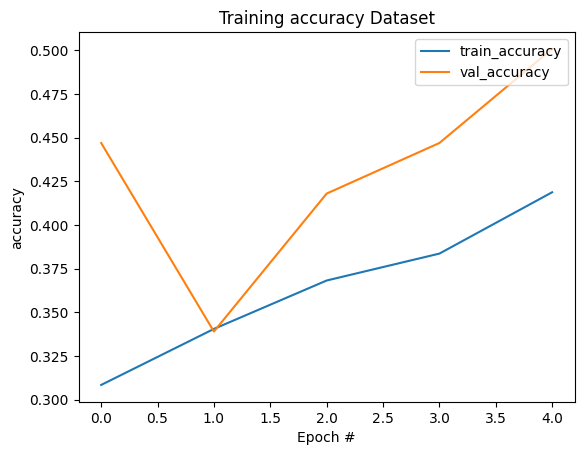

In [124]:
# Plotting the loss vs epoch curve for the Transfer Learning model
plot_history(new_model_history2)

In the above plot, I see the model performed better on the validation set, with an accuracy of 50%, than the training set, with an accuracy of 40%.

### **Evaluating the ResNet Model**

In [125]:
# Evaluate model
new_model2.evaluate(X_test_rgb, y_test_encoded, verbose = 2)

8/8 - 0s - loss: 1.7052 - accuracy: 0.2500 - 316ms/epoch - 40ms/step


[1.7051973342895508, 0.25]

In the above output, I see that after processing all batches, we got a loss score of 1.71. The model correctly predicted 25% of the samples. It took approximately 316ms on average to process one epoch. It took 40 milliseconds to process one mini-batch.

8/8 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.23      0.69      0.35        64
           1       0.40      0.06      0.11        64
           2       0.33      0.25      0.29        64
           3       0.00      0.00      0.00        64

    accuracy                           0.25       256
   macro avg       0.24      0.25      0.19       256
weighted avg       0.24      0.25      0.19       256



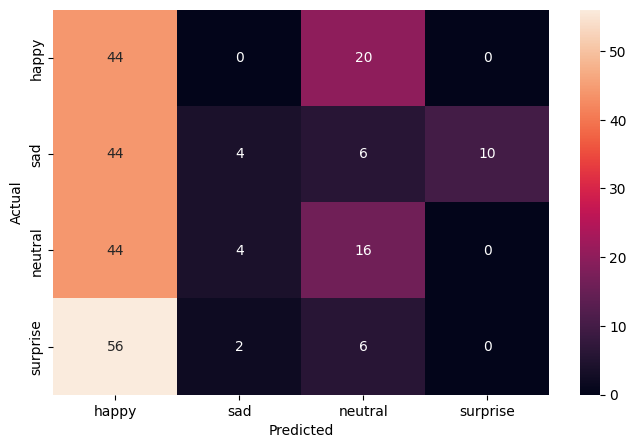

In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Use trained data
pred = new_model2.predict(X_test_rgb)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral','surprise'], yticklabels=['happy', 'sad', 'neutral','surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In the above plot, I see the face emotion happy was correctly predicted 44 times. I also see the face emotion surprise was predicted as happy 56 times.

**Observations and Insights:**

The performance of the model in the validation set has an accuracy that drops as low as 35%, but ultimately it improves and ends on 50%. The performance of the model in the training set has an accuracy that is consistently improving, reaching an accuracy of 42%.

## **EfficientNet Model**

In [127]:
pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [128]:
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.models import Model

In [129]:
# Summary of the whole model
model3 = EfficientNetB0(weights='imagenet')
model3.summary()

21826536/21826536 [==============================] - 1s 0us/step
Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                   

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [130]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [131]:
# Retrieves up to chosen layer from the pre-existing ResNet V2 model
transfer_layer3 = model3.get_layer('block7a_project_bn')
effnet_model = Model(inputs=model3.input, outputs=transfer_layer3.output)

In [132]:
effnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                             

In [133]:
effnet_model = EfficientNetB0(weights='imagenet', include_top = False, input_shape = (150,150,3))
effnet_model.summary()

16804768/16804768 [==============================] - 2s 0us/step
Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 75, 75, 32)   864         ['input_1[0][0]']                
                                                                                                  
 stem_bn (BatchNormalization)   (None, 75, 75, 32)   128         ['stem_conv[0][0]']              
                                                                                                  
 stem_activation (A

In [134]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
# When freezing, weights will remain unchanged during training
for layer in effnet_model.layers:
    layer.trainable = False

In [135]:
for layer in effnet_model.layers:
    print(layer.name, layer.trainable)

input_1 False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block3a_expand_conv Fa

In [136]:
new_model3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model3.add(resnet_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model3.add(Flatten())

# Adding a dense output layer
new_model3.add(Dense(512, activation='relu'))
new_model3.add(Dense(256, activation='relu'))
new_model3.add(Dense(128, activation='relu'))

# Adding the output layer for multi-class classification (4 categories)
new_model3.add(Dense(4, activation='softmax'))

# Using Adam Optimizer
opt = Adam(learning_rate=0.001)

new_model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 5, 5, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 49,944,452
Trainable params: 26,379,652
No

### **Compiling and Training the Model**

In [137]:
new_model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [138]:
# Fitting the VGG model
new_model_history3 = new_model3.fit(train_set_rgb,
                                  validation_data=validation_set_rgb,
                                  epochs=5)

Epoch 1/5
237/237 [==============================] - 100s 402ms/step - loss: 128.6202 - accuracy: 0.3079 - val_loss: 16.9446 - val_accuracy: 0.3657
Epoch 2/5
237/237 [==============================] - 93s 392ms/step - loss: 9.5152 - accuracy: 0.3347 - val_loss: 5.0317 - val_accuracy: 0.3767
Epoch 3/5
237/237 [==============================] - 92s 390ms/step - loss: 2.8475 - accuracy: 0.3762 - val_loss: 2.4458 - val_accuracy: 0.3187
Epoch 4/5
237/237 [==============================] - 92s 389ms/step - loss: 1.4949 - accuracy: 0.4141 - val_loss: 1.5107 - val_accuracy: 0.3687
Epoch 5/5
237/237 [==============================] - 93s 391ms/step - loss: 1.3134 - accuracy: 0.4394 - val_loss: 1.4454 - val_accuracy: 0.3904


In [139]:
# Function to plot loss, val_loss,
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

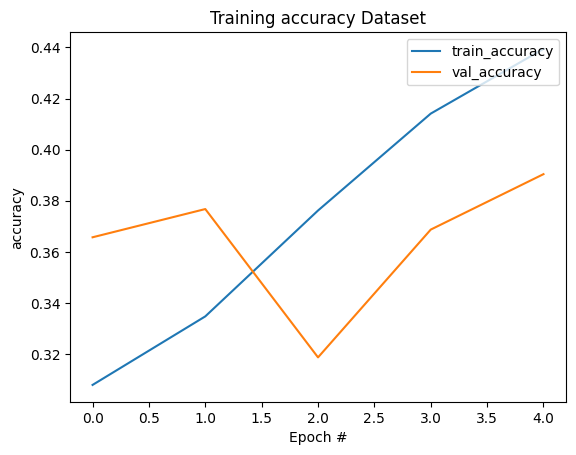

In [140]:
# Plotting the loss vs epoch curve for the Transfer Learning model
plot_history(new_model_history3)

In the above plot, I see the model performed better on the train set, with an accuracy of 44%, than the validation set, with an accuracy of 40%.

### **Evaluating the EfficientnetNet Model**

In [141]:
# Evaluate model
new_model3.evaluate(X_test_rgb, y_test_encoded, verbose = 2)

8/8 - 0s - loss: 1.5077 - accuracy: 0.2422 - 108ms/epoch - 13ms/step


[1.5077037811279297, 0.2421875]

In the above output, I see that after processing all batches, we got a loss score of 1.51. The model correctly predicted 24% of the samples. It took approximately 108ms on average to process one epoch. It took 13 milliseconds to process one mini-batch.

8/8 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.33      0.09      0.15        64
           1       0.16      0.22      0.18        64
           2       0.28      0.66      0.39        64
           3       1.00      0.00      0.00        64

    accuracy                           0.24       256
   macro avg       0.44      0.24      0.18       256
weighted avg       0.44      0.24      0.18       256



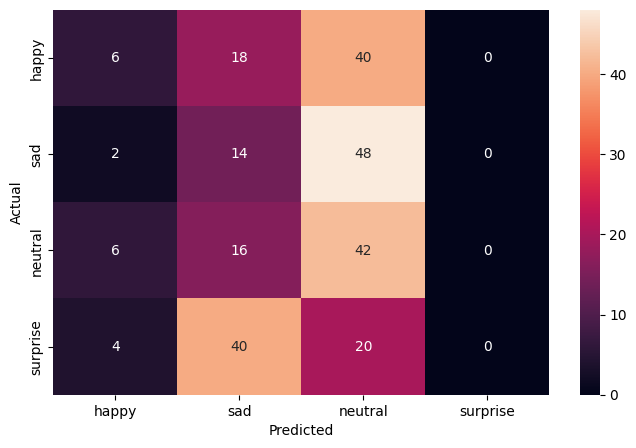

In [152]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Use trained data
pred = new_model3.predict(X_test_rgb)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred, zero_division=1))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral','surprise'], yticklabels=['happy', 'sad', 'neutral','surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In the above plot, I see the face emotion neutral was correclty predicted 42 times. I also see that the face emotion neutral was predicted as sad 16 times.

**Observations and Insights:**

The performance of the model in the validation set has an accuracy that drops as low as 32%, but ultimately it improves and ends on 40%. The performance of the model in the training set has an accuracy that is consistently improving, reaching an accuracy of 44%.

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

The overall performance of these Transfer Learning Architectures is not good in comparison to the CNN models previously built. I believe the reason is because the number of epochs is small. We are not satisfied with the accuracies we have received. I notice that all these three models the have a consistently improving accuracy on the training set, but on the validation set there are peaks and valleys. In only one model the accuracy of the validation set was better than the train set, ResNet model.

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [154]:
from keras.preprocessing.image import ImageDataGenerator

# Set batch size, which is the number of images that will be procesed together during each iteration of training
# The larger the batch size, the more memory it requires
# Increasing the batch size since it is a transfer learning architecture
batch_size  = 64

# Creates an instance of ImageDataGenerator that allows to preprocess image while loading them for training even when data augmentation parameters are not given
# Data augmentation generates additional training images with random transformation
# Data augmentation is done to all classes, not just the imbalanced class. If you were only to augment the imbalanced class, you would get a greater imbalance
datagen_train  = ImageDataGenerator(
    # Randomly rotate images within range of 15 degrees
    rotation_range = 15,
    # Randomly shift images horizontally by 10% of the total width
    width_shift_range = 0.1,
    # Randomly shift images vertically by 10% of the total height
    height_shift_range = 0.1,
    # Apply shear tranformation (geometric transformation) with a shear intensity of 20% (magnituted of shear effect applied to image)
    shear_range = 0.2,
    # Randomly zoom images by up to 20%
    zoom_range = 0.2,
    # Randomly flip images horizontally
    horizontal_flip = True,
    # Use the nearest pixel to fill newly created pixels during transformations
    fill_mode = 'nearest'
)

# ImageDataGenerator allows to preprocess image while loading them for training even when data augmentation parameters are not given
# Data augmentation parameters are not applied to validation and test data sets because the pururpose of these datasets is to evaluate the model's performance on real, unchanged data
datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()

# Generates training data set using the flow_from_directory method
# flow_from_directory method ensures trainingi data is efficiently streamed to the model during training
train_set = datagen_train.flow_from_directory(
                                              # Path to directory that contains training images for different face emotions
                                              DATADIR,
                                              # Size images will be resized to
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              # Choice of RGB mode images will be loaded. This mode is what is accepted by transfer learning architectures
                                              color_mode = "grayscale",
                                              # Batch size for the training data generator
                                              batch_size = batch_size,
                                              # Mentions that problem is a categorial classification task
                                              class_mode = 'categorical',
                                              # Names of classes that model will be trained to recognize
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              # Data generator will shuffle data at the end of each epoch
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(DATADIR_val,
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(DATADIR_test,
                                              target_size = (IMG_SIZE, IMG_SIZE),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['sad', 'happy', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15129 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [155]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [156]:
from keras import regularizers
# Intializing a sequential model
custom_model = Sequential()

# First Convolutional Block
custom_model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 1), padding='same'))
custom_model.add(LeakyReLU(0.1))
custom_model.add(MaxPooling2D(2, 2))
custom_model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Second Convolutional Block
custom_model.add(Conv2D(128, (3, 3), padding='same'))
custom_model.add(LeakyReLU(0.1))
custom_model.add(MaxPooling2D(2, 2))
custom_model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Third Convolutional Block
custom_model.add(Conv2D(256, (3, 3), padding='same'))
custom_model.add(LeakyReLU(0.1))
custom_model.add(MaxPooling2D(2, 2))
custom_model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Fourth Convolutional Block
custom_model.add(Conv2D(512, (3, 3), padding='same'))
custom_model.add(LeakyReLU(0.1))
custom_model.add(MaxPooling2D(2, 2))
custom_model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

# Fifth Convolutional Block
custom_model.add(Conv2D(512, (3, 3), padding='same'))
custom_model.add(LeakyReLU(0.1))
custom_model.add(MaxPooling2D(2, 2))
custom_model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_regularizer=regularizers.l2(0.01)))

custom_model.add(Flatten())

# Fully Connected Block
custom_model.add(Dense(1024))
custom_model.add(LeakyReLU(0.1))
custom_model.add(Dropout(0.5))

# Classifier
custom_model.add(Dense(4, activation='softmax'))

opt = SGD(learning_rate = 0.01, momentum = 0.9)

custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 128)       0

### **Compiling and Training the Model**

In [157]:
# Compiling the model
custom_model.compile(loss ='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [158]:
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es_c = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc_c = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

# Fitting the model with 60 epochs and validation_split as 10%
history_c=custom_model.fit(X_train,
          y_train_encoded,
          epochs = 60,
          batch_size= 32, validation_split = 0.10, callbacks = [es_c, mc_c])

Epoch 1/60
425/426 [============================>.] - ETA: 0s - loss: 9.4486 - accuracy: 0.3818
Epoch 1: val_accuracy improved from -inf to 0.50562, saving model to best_model.h5
426/426 [==============================] - 9s 16ms/step - loss: 9.4414 - accuracy: 0.3821 - val_loss: 3.2937 - val_accuracy: 0.5056
Epoch 2/60
424/426 [============================>.] - ETA: 0s - loss: 2.0984 - accuracy: 0.5379
Epoch 2: val_accuracy improved from 0.50562 to 0.57105, saving model to best_model.h5
426/426 [==============================] - 6s 15ms/step - loss: 2.0966 - accuracy: 0.5375 - val_loss: 1.3580 - val_accuracy: 0.5711
Epoch 3/60
424/426 [============================>.] - ETA: 0s - loss: 1.1195 - accuracy: 0.6092
Epoch 3: val_accuracy improved from 0.57105 to 0.63781, saving model to best_model.h5
426/426 [==============================] - 6s 15ms/step - loss: 1.1187 - accuracy: 0.6094 - val_loss: 0.9565 - val_accuracy: 0.6378
Epoch 4/60
425/426 [============================>.] - ETA: 0s

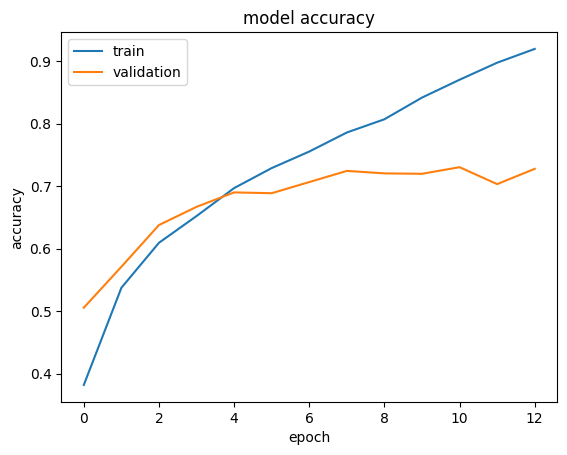

In [159]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history_c.history['accuracy'])
plt.plot(history_c.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In the above plot, I see the model performed better on the train set, with an accuracy of 90%, than the validation set, with an accuracy of 70%.

### **Evaluating the Model on Test Set**

In [160]:
custom_model.evaluate(X_test, y_test_encoded, verbose = 2)

8/8 - 0s - loss: 637.0684 - accuracy: 0.4141 - 66ms/epoch - 8ms/step


[637.068359375, 0.4140625]

**Observations and Insights:**

In the above output, I see that it after processing all batches, we got a loss score of 637.06. The model correctly predicted 41% of the samples. It took approximately 66 on average to process one epoch. It took 8 milliseconds to process one mini-batch.

### **Plotting the Confusion Matrix for the chosen final model**

8/8 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        64
           1       0.00      0.00      0.00        64
           2       0.42      0.25      0.31        64
           3       0.35      0.91      0.50        64

    accuracy                           0.41       256
   macro avg       0.35      0.41      0.34       256
weighted avg       0.35      0.41      0.34       256



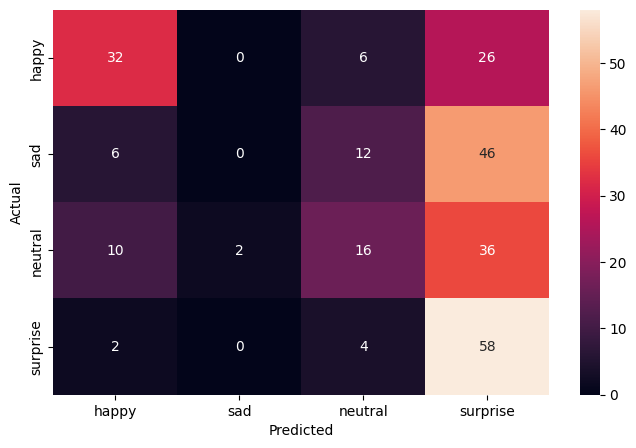

In [161]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = custom_model.predict(X_test)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred, zero_division=1))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral','surprise'], yticklabels=['happy', 'sad', 'neutral','surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

In the above plot, I see the face emotion surprise was correctly predicted 58 times. I also see that the face emotion neutral was predicted as surprise 36 times.

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

## **Conclusion:**

The first CNN that receives images in RGB mode has a greater number of trainable parameters (11,009,772) than the one that receives images in grayscale mode (11,009,196).

The first CNN that receives images in RGB performs better in the train set (90%) than the one that recieves images in grayscale (80%). Both have the same performance on the validation set, with an accuracy of 70%.

After evaluating both models on the test dataset, I noticed that the first CNN that receives images in RGB has a significantly better loss (0.80) and accuracy (73%) than the one that receives images in grayscale.

The second CNN that receives images in RGB mode has a greater number of trainable parameters (8,391,940) than the one that receives images in grayscale mode (8,391,364).

Both models have approximately the same performance in the validation (70%) and training data (80%). In both models there is a better performance in the training data than the validation data.

After evaluating both models on the test data set, I noticed that the model that receives images in RGB color mode has a significant better accuracy (74%) and loss (0.77) than the model that receives images in grayscale.

RGB images contain more detailed and rich information about visual content, including color variations and texture details. Therefore, it has an advantage over the grayscale.

Both CNN models that receive RGB images are using Stochastic Gradient Descent as its optimizer and they include batch normalization layers, dropout layers, and early stopping to avoid overfitting. Stochastic Gradient Descent optimizer was chosen over Adam optimizer because it provided a better performing models. The difference between them is that the second model has two additional convolutional blocks. This difference gave the second CNN model a slightly better performance on the testing data set than the first model.

The model that uses VGG16 architecture has 4,359,556 trainable parameters. It also has four convolutional blocks.

The model that uses ResNet architecture has 23,519,360 trainable parameters. It also has five convolutional blocks.

The model that uses EfficientNet architecture has 4,007,548 trainable parameters. It also has seven convolutional blocks.

All these models that use transfer learning use the same flattening layer, output layers, and adam optimizers. In this case the Adam optimizer performed better than the SGD optimizer.

When comparing the performance of these models with the previously built, I notice that the number of layers and epochs chosen marks the difference between a model with a high accuracy and low loss and one that has low accuracy and high loss. A low number of epochs was chosen for these models due to limitations on computational resources.

The custom built model has 12,306,308 trainable parameters. It also has six convolutional blocks and uses SGD optimizer. This model includes batch normalization layer, dropout layer, and early stopping to prevent overfitting. The performance of this model is not as good as the one of the second CNN model. This model has an accuracy of 41% and a high loss on the test set.

Considering all the above, I would choose the second CNN model that receives images in RGB mode since it had the highest accuracy, 74%, and a the lowest loss, 0.77.
